In [108]:
import numpy as np
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt

In [87]:
# Download latest version
path = kagglehub.dataset_download("russellyates88/suicide-rates-overview-1985-to-2016")
print("Path to dataset files:", path)

Path to dataset files: /home/gitpod/.cache/kagglehub/datasets/russellyates88/suicide-rates-overview-1985-to-2016/versions/1


In [88]:
file_path = '/home/gitpod/.cache/kagglehub/datasets/russellyates88/suicide-rates-overview-1985-to-2016/versions/1'
all_files = os.listdir(file_path)
for i in all_files:
    print(i)

master.csv


In [89]:
suicide = pd.read_csv('/home/gitpod/.cache/kagglehub/datasets/russellyates88/suicide-rates-overview-1985-to-2016/versions/1/master.csv')

In [90]:
# Chọn hàng có giá trị cụ thể ở 1 label 
suicide_2000 = suicide[suicide['year'] == 2000]
# suicide[suicide['country'].str.startswith('D')]

In [91]:
# Sắp xếp theo thứ tự cụ thể
suicide_2000 = suicide_2000.sort_values(by='suicides/100k pop',ascending = False)

In [92]:
group_by_age = suicide.groupby('age')['suicides_no'].sum()

In [93]:
group_by_gender = suicide.groupby('sex')['suicides_no'].sum()

In [94]:
# group_by_country = suicide.groupby('country')['suicides_no'].sum()
# Sau khi dùng câu này, thu được kết quả là pandas series 

# Để chuyển đổi pandas series thành data frame (dạng bảng) cần sử dụng .reset_index()

group_by_country = suicide_2000.groupby('country')['suicides_no'].sum().reset_index()

In [95]:
# Lấy dữ liệu population

population_by_country = suicide_2000.groupby('country')['population'].mean().reset_index()

In [96]:
# Merge dữ liệu population vào dataframe 

group_by_country = group_by_country.merge(population_by_country, on = 'country', how = 'inner')

In [97]:
# Tính cột suicides/100K population

group_by_country['suicides/100k population'] = group_by_country['suicides_no'] / group_by_country['population'] * 100000

In [100]:
# Sắp xếp lại theo thứ tự từ lớn đến bé của cột suicides/100K population

suicides_2000_sorted = group_by_country.sort_values(by = 'suicides/100k population', ascending = False).reset_index(drop=True)

In [168]:
# Chọn dữ liệu để vẽ biểu đồ

top_10 = suicides_2000_sorted.head(10)

In [169]:
# Tạo thêm 1 hàng others dành cho những quốc gia còn lại

other_suicides = {'country':'Other countries','suicides_no':suicides_2000_sorted.iloc[10:]['suicides_no'].sum()}

In [170]:
# Thêm hàng đó vào dataframe hiện có

top_countries = pd.concat([top_10, pd.DataFrame([other_suicides])], ignore_index=True)

In [ ]:
# Bảng màu

pastel_colors = [
    "#FFB3BA",  # pastel red/pink
    "#FFDFBA",  # pastel orange
    "#FFFFBA",  # pastel yellow
    "#BAFFC9",  # pastel green
    "#BAE1FF",  # pastel blue
    "#E3BAFF",  # pastel purple
    "#FFC9DE",  # pastel rose
    "#D5F3FF",  # light sky blue
    "#F0E3FF",  # lavender
    "#C2F0FC",  # soft cyan
    "#FCE1C3",  # soft peach
    "#FADADD"   # very light pink
]

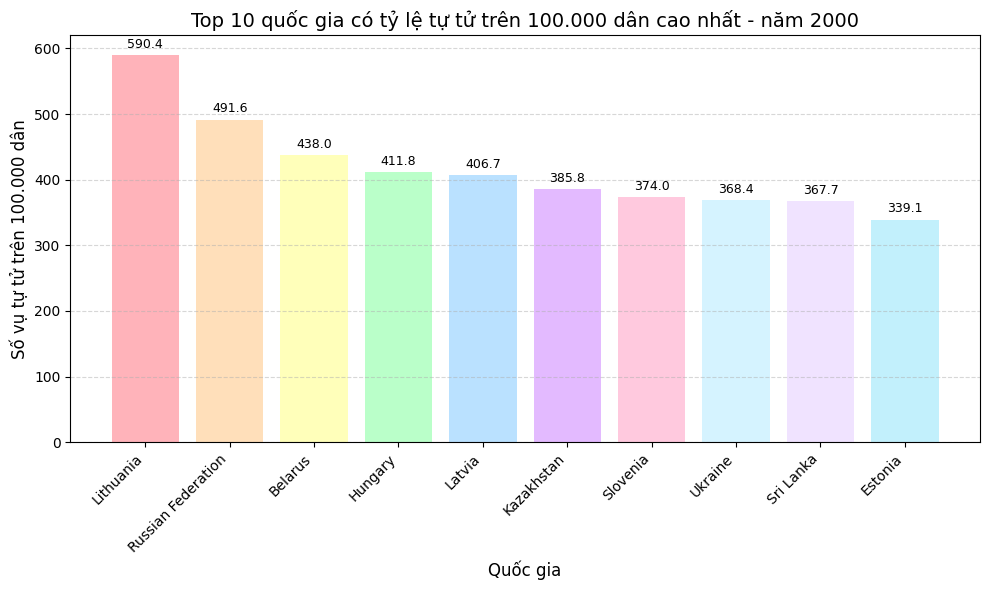

In [196]:
#Tạo biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))  # Điều chỉnh kích thước biểu đồ

# Vẽ biểu đồ cột
bars = ax.bar(
    top_countries['country'],
    top_countries['suicides/100k population'],
    color=pastel_colors
)

# Thêm số trên đầu mỗi cột
for bar in bars:
    height = bar.get_height()         # Lấy 'chiều cao' của từng cột, đây là số được hiển thị 
    ax.annotate(f'{height:.1f}',      # .annotate là hàm dùng để chèn chú thích vào biểu đồ
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

# Cài đặt trục và tiêu đề
ax.set_title('Top 10 quốc gia có tỷ lệ tự tử trên 100.000 dân cao nhất - năm 2000', fontsize=14)
ax.set_xlabel('Quốc gia', fontsize=12)
ax.set_ylabel('Số vụ tự tử trên 100.000 dân', fontsize=12)

# Xoay nhãn trục X để dễ đọc
plt.xticks(rotation=45, ha='right')

# Bật grid nhẹ cho trục y
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

# Tăng khoảng cách các phần trong figure
plt.tight_layout()
